In [7]:
import os, sys
sys.path.append(os.path.join('..','libs'))
from read_smn import read_smn

In [16]:
pepe = read_smn(os.path.join('..',
                             'Data',
                             'junio-SMN',
                             'horario'))

In [19]:
tstamps, data = pepe.filter_by_station('SALTA')
temp = data[:,0]

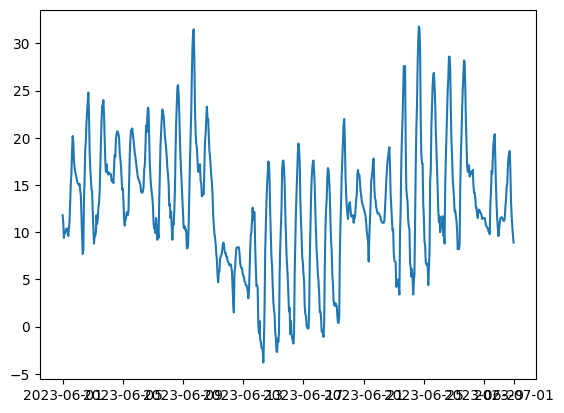

In [20]:
import matplotlib.pyplot as plt
plt.plot(tstamps, temp)

In [22]:
temp_train = temp[:600]
temp_test = temp[600:]

def create_dataset(X, delay):
    x = X[:-delay]
    y = X[delay:]
    return x,y

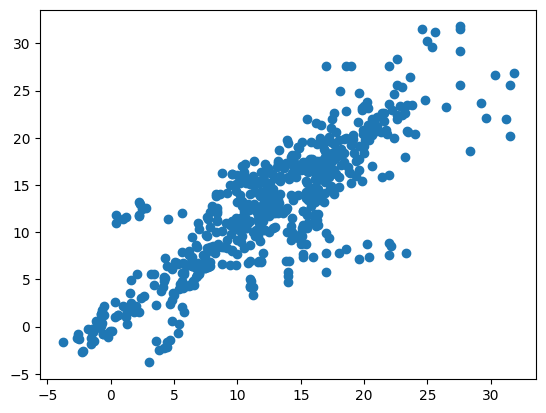

In [33]:
x_train, y_train = create_dataset(temp_train, 24)
plt.scatter(x_train, y_train)

In [40]:
from sklearn.linear_model import LinearRegression
import numpy as np

lineal = LinearRegression()
lineal.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))
print(lineal.coef_, lineal.intercept_)

[[0.85772116]] [1.82276726]


In [52]:
x_lin = np.linspace(-5,35,100)
y_lin = lineal.coef_.reshape(-1)*x_lin+lineal.intercept_

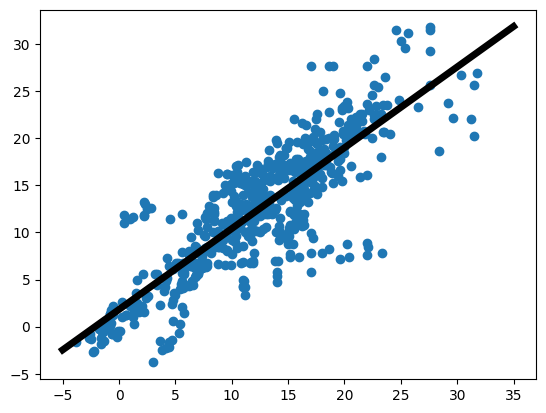

In [53]:
plt.scatter(x_train, y_train)
plt.plot(x_lin, y_lin, 'k-', lw=5)

In [55]:
x_test, y_test = create_dataset(temp_test,24)
y_pred_test = lineal.predict(x_test.reshape(-1,1))
print(y_pred_test.shape)

(96, 1)


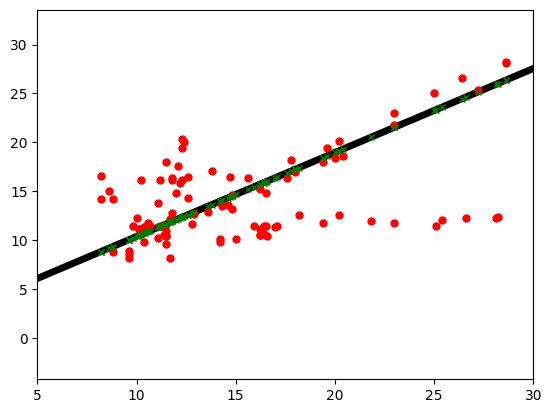

In [57]:
plt.xlim(5,30)
plt.plot(x_lin, y_lin, 'k-', lw = 5)
plt.plot(x_test, y_test, 'ro', ms = 5)
plt.plot(x_test, y_pred_test.reshape(-1), 'gx', ms=5)

In [58]:
from sklearn.metrics import mean_absolute_error
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f'El error absoluto medio en el conjunto de test: {mae_test}')

El error absoluto medio en el conjunto de test: 3.2370556182737915


In [61]:
def pipeline(train, test, delay):
    x_train, y_train = create_dataset(train, delay)
    lineal = LinearRegression()
    lineal.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))
    x_test, y_test = create_dataset(test,delay)
    y_pred_test = lineal.predict(x_test.reshape(-1,1))
    mae_test = mean_absolute_error(y_test, y_pred_test)
    print(f'El error absoluto medio en el conjunto de test: {mae_test}')
    return mae_test


El error absoluto medio en el conjunto de test: 1.1369604022771957
El error absoluto medio en el conjunto de test: 2.0675305215029596
El error absoluto medio en el conjunto de test: 2.8314436872887985
El error absoluto medio en el conjunto de test: 3.3418490290191043
El error absoluto medio en el conjunto de test: 3.6222917652265605
El error absoluto medio en el conjunto de test: 3.781484327085481
El error absoluto medio en el conjunto de test: 3.8801256582344474
El error absoluto medio en el conjunto de test: 3.9687651615715964
El error absoluto medio en el conjunto de test: 4.004347738843219
El error absoluto medio en el conjunto de test: 4.0064348258292535
El error absoluto medio en el conjunto de test: 4.017623279012743
El error absoluto medio en el conjunto de test: 3.988661850580447
El error absoluto medio en el conjunto de test: 3.9309819013416085
El error absoluto medio en el conjunto de test: 3.867607325734076
El error absoluto medio en el conjunto de test: 3.828189357970895
E

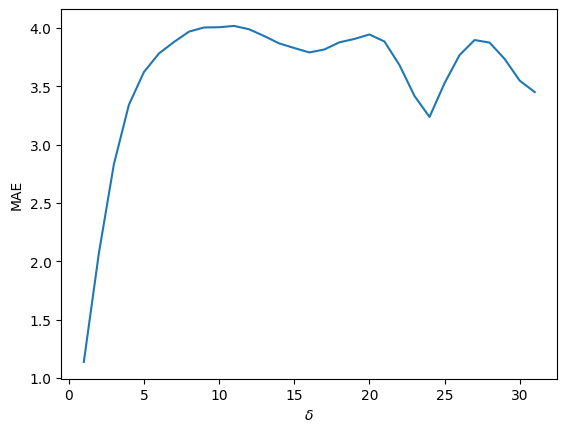

In [65]:
maes = []
for i in range(1,32):
    maes.append(pipeline(temp_train, temp_test, i))
plt.plot(np.arange(1,32), maes, label = 'error absoluto medio')
plt.xlabel('$\delta$')
plt.ylabel('MAE')
plt.show()